# Imports & Setup

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import numpy as np
%matplotlib inline

# Getting Data

Set up a generator to read lines from the file

In [32]:
def json_line_gen(file_name):
    for row in open(file_name, "r"):
        yield row

Append the lines taken from the generator to the Dataframe

In [33]:
json_response = json_line_gen('./../data/raw.json')

df = pd.DataFrame()

for json in json_response:
    df = df.append(pd.read_json(json), sort=False)

In [34]:
# Have we got our data?
df.shape

(16770, 25)

# Clean-up & Prep

We need to clean and prep our data before doing some visualization

In [35]:
# Data has an ID - lets use it
df = df.set_index("id")

In [36]:
unwanted_columns = ["canonical_url", "collection_id", "cover_image", "created_at","crossposted_at", \
                    "description", "edited_at", "flare_tag", "path", "readable_publish_date", "slug", \
                    "social_image", "type_of", "user", "last_comment_at", "organization"]

df = df.drop(columns=unwanted_columns)

In [37]:
# Splitting Timestamp into hour and day of week
df['hour'] = pd.to_datetime(df['published_at']).dt.hour
df['day_of_week'] = pd.to_datetime(df['published_at']).dt.strftime('%A')

In [38]:
# What's this look like?
df.head()

,title,url,comments_count,positive_reactions_count,published_at,published_timestamp,tag_list,tags,hour,day_of_week
id,,,,,,,,,,
270484,Browsing a localhost server from any device in...,https://dev.to/fdoxyz/browsing-a-localhost-ser...,5,36,2020-03-02 22:18:49+00:00,2020-03-02T22:18:49Z,"[beginners, webdev, mobile]","beginners, webdev, mobile",22,Monday
272982,What it's like to be a technical female founde...,https://dev.to/rhiannonmonks/what-it-s-like-to...,3,17,2020-03-03 02:05:31+00:00,2020-03-03T02:05:31Z,[shecoded],shecoded,2,Tuesday
272396,Node-secure release v0.5.0,https://dev.to/fraxken/node-secure-release-v0-...,2,34,2020-03-02 19:47:14+00:00,2020-03-02T19:47:14Z,"[javascript, node, npm, security]","javascript, node, npm, security",19,Monday
272318,Stackoverflow Survey Thoughts,https://dev.to/thinkster/stackoverflow-survey-...,6,28,2020-03-02 16:55:20+00:00,2020-03-02T16:55:20Z,"[webdev, productivity, computerscience]","webdev, productivity, computerscience",16,Monday
272345,"Nevertheless, Claire Collins Coded",https://dev.to/clairec/nevertheless-claire-col...,2,22,2020-03-02 18:00:53+00:00,2020-03-02T18:00:53Z,[shecoded],shecoded,18,Monday


# Getting a reaction heatmap

In [39]:
#Group by day and hour for average reaction
reaction_df = df.groupby(["day_of_week", "hour"]) ["positive_reactions_count"].mean()

#pivot and arrange columns
reaction_df = reaction_df.reset_index().pivot('hour', 'day_of_week', 'positive_reactions_count')
reaction_df = reaction_df[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]

In [40]:
reaction_df

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,54.101010,58.785714,92.723577,48.670588,58.367816,50.483871,56.701031
1,67.737705,75.095238,87.153846,75.271186,54.258065,66.446809,81.671875
2,70.333333,65.846154,63.533333,74.430556,51.645161,39.309524,48.434783
3,70.255814,100.712121,67.403509,53.266667,45.103448,63.857143,44.500000
4,61.061224,55.057692,52.964912,49.222222,49.474576,62.621622,55.119048
5,49.823529,86.725490,85.733333,36.940000,48.553571,51.166667,62.555556
6,91.223881,57.327273,49.442308,51.594595,67.106061,56.175000,65.395833
7,79.851852,63.403846,59.272727,57.061538,49.325000,52.318182,47.781250
8,72.734177,113.527473,79.448718,75.783784,52.972603,63.481481,58.820513


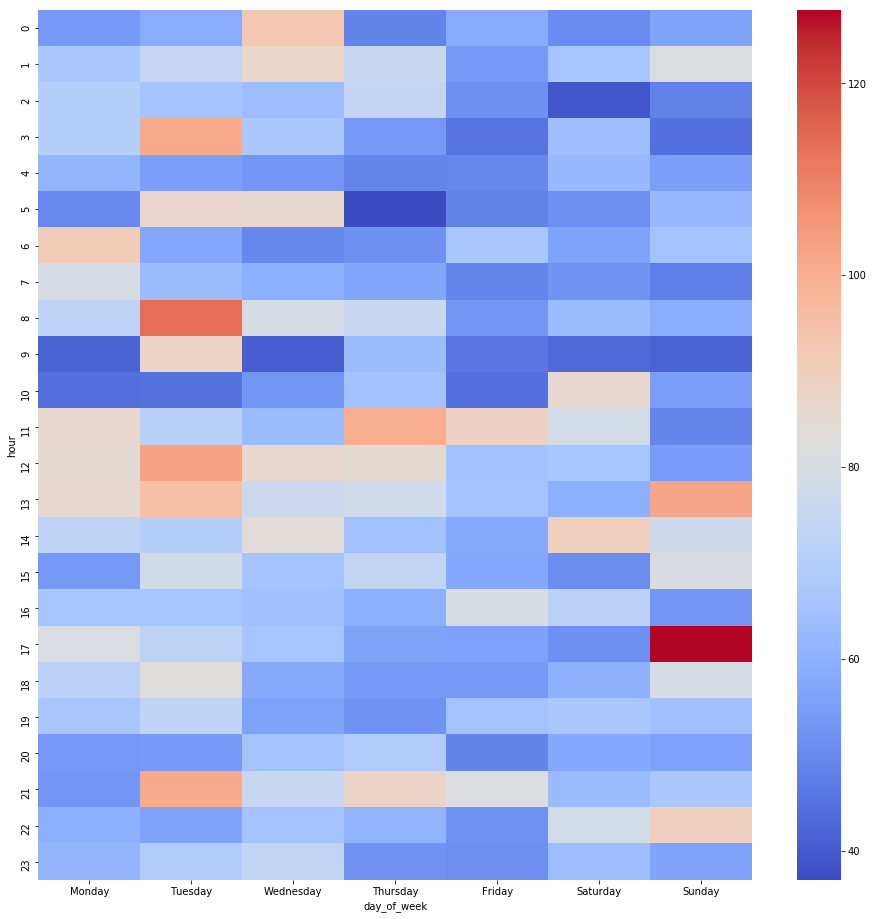

In [41]:
# Generate heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(reaction_df , cmap="coolwarm")

## Outliers

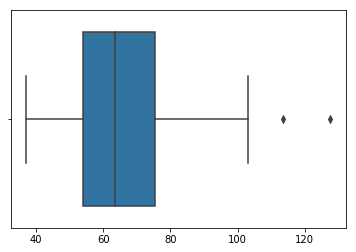

In [42]:
# Checking for outliers
sns.boxplot(reaction_df)

In [43]:
outlier_df = df.copy()

In [44]:
z = np.abs(stats.zscore(outlier_df["positive_reactions_count"]))
outlier_df = outlier_df[(z < 4)]

In [45]:
reaction_df = outlier_df.groupby(["day_of_week", "hour"]) ["positive_reactions_count"].mean()

#pivot and arrange columns
reaction_df = reaction_df.reset_index().pivot('hour', 'day_of_week', 'positive_reactions_count')
reaction_df = reaction_df[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]

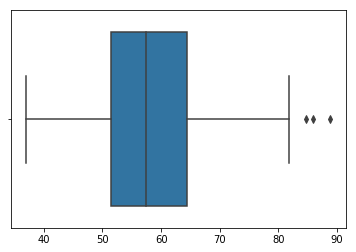

In [46]:
sns.boxplot(reaction_df)

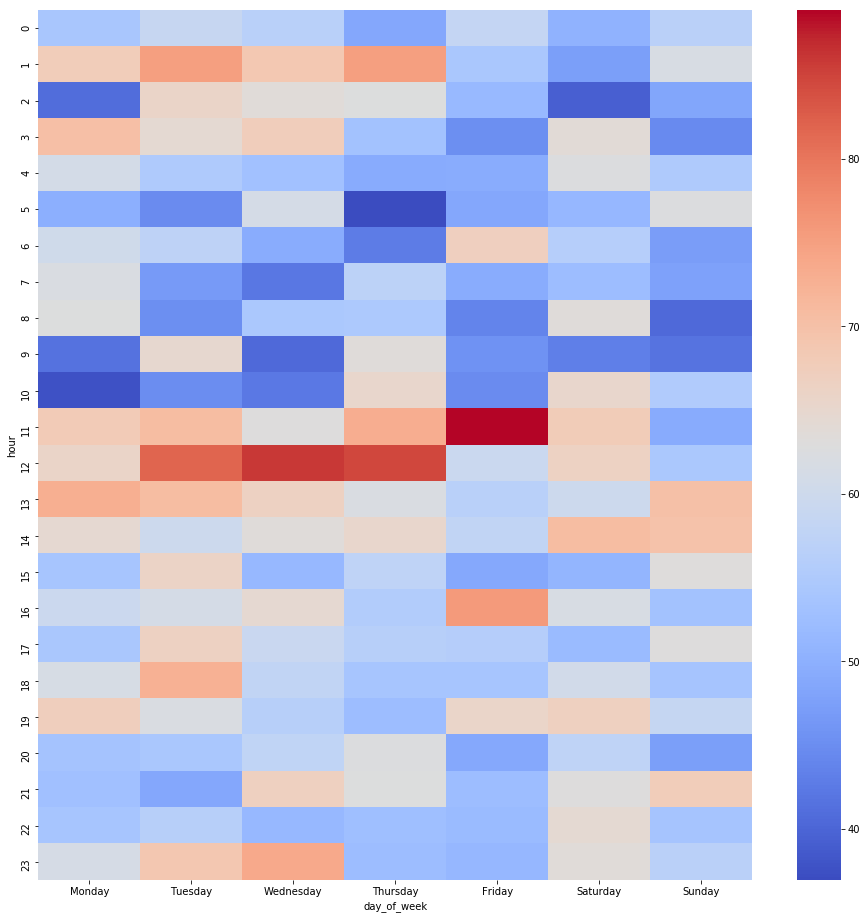

In [47]:
# Arranging columns and remaking heatmap without the outliers
reaction_df = reaction_df[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
plt.figure(figsize=(16, 16))
sns.heatmap(reaction_df , cmap="coolwarm")

# Tag Specfic Heatmaps

In [48]:
tag_df = outlier_df.copy()

In [49]:
# Tag to find map for
tag = 'discuss'

tag_df = tag_df.loc[tag_df['tags'].str.contains(tag, case=False, na=False)]

In [50]:
tag_df = tag_df.groupby(["day_of_week", "hour"]) ["positive_reactions_count"].mean()
tag_df = tag_df.reset_index().pivot('hour', 'day_of_week', 'positive_reactions_count')
tag_df = tag_df[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]

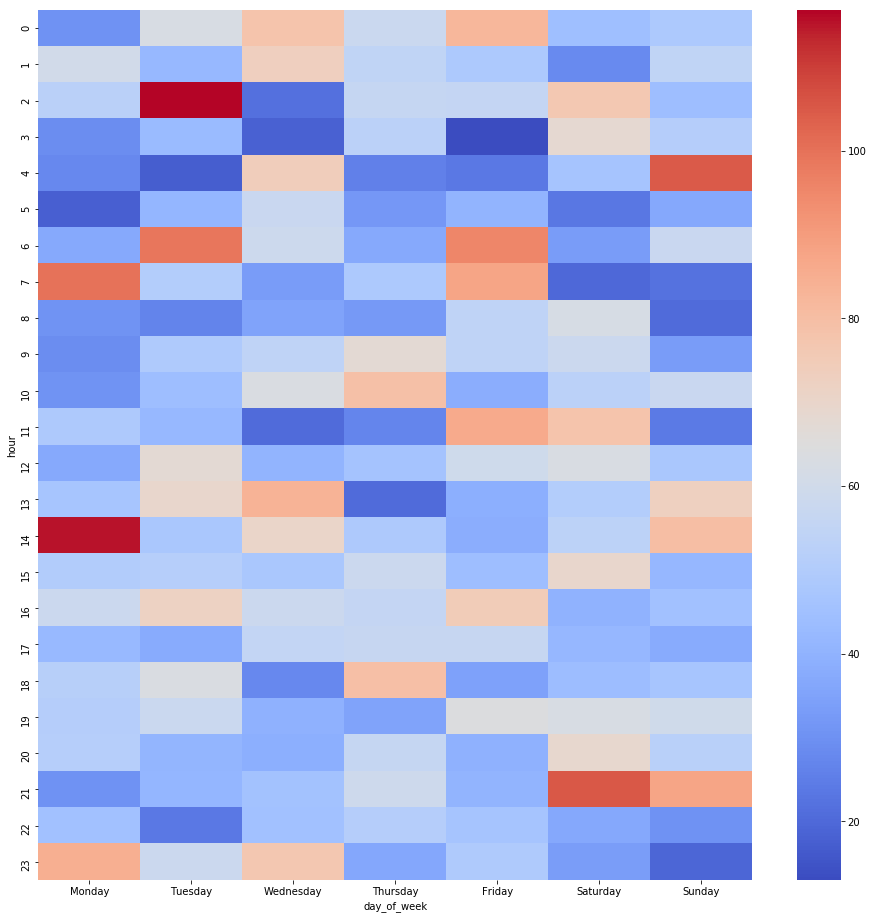

In [51]:
plt.figure(figsize=(16, 16))
sns.heatmap(tag_df , cmap="coolwarm")

# Comment / Interactive

In [79]:
comment_df = df.copy()

In [80]:
# z = np.abs(stats.zscore(outlier_df["comments_count"]))
# outlier_df = outlier_df[(z < 3)]

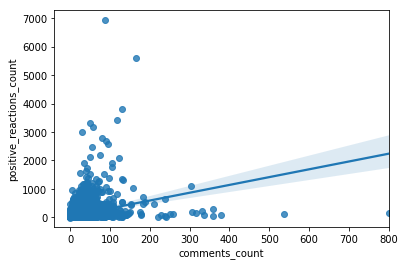

In [81]:
sns.regplot(comment_df["comments_count"], comment_df["positive_reactions_count"])

In [82]:
comment_df = comment_df.groupby(["day_of_week", "hour"]) ["comments_count"].mean()
comment_df = comment_df.reset_index().pivot('hour', 'day_of_week', 'comments_count')
comment_df = comment_df[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]

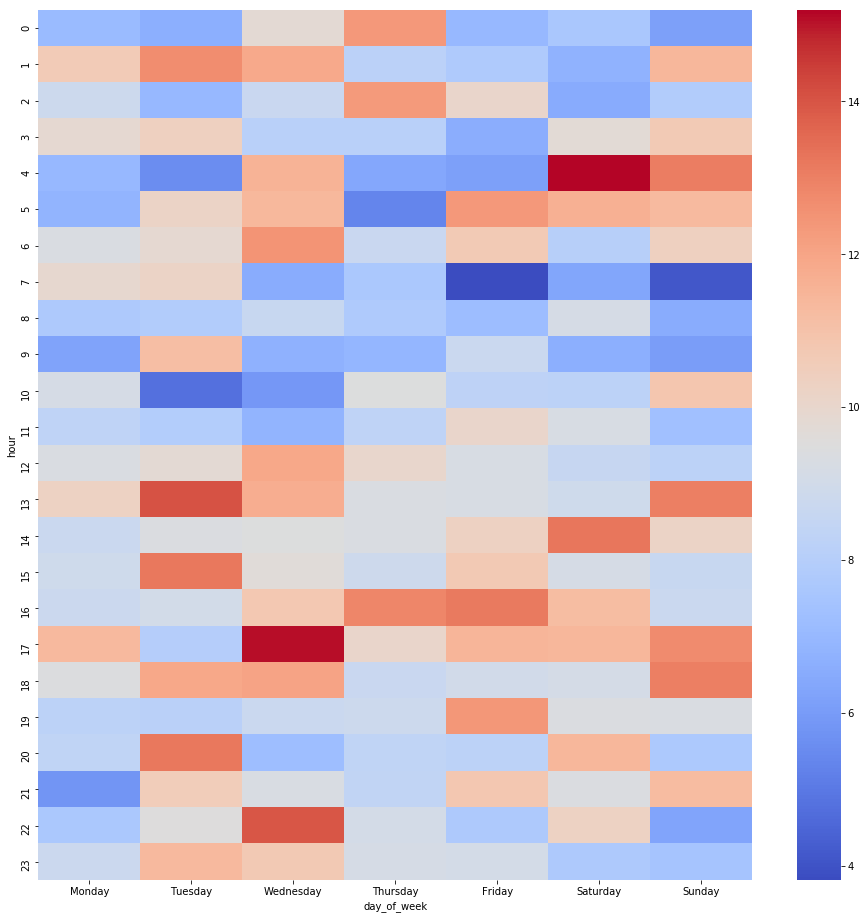

In [83]:
plt.figure(figsize=(16, 16))
sns.heatmap(comment_df , cmap="coolwarm")

# Tag Popularity?

In [105]:
popular_df = df.copy()

In [106]:
z = np.abs(stats.zscore(popular_df["positive_reactions_count"]))
popular_df = popular_df[(z < 1)]

In [97]:
# Whats the average reacts? 
popular_df['positive_reactions_count'].mean()

67.47572815533981

In [107]:
# Expand the Tag list into its own rows
popular_df = popular_df.explode('tag_list')
popular_df["tag_list"] = popular_df["tag_list"].fillna('None')

In [108]:
popular_sum_df = popular_df.groupby(['tag_list'])["positive_reactions_count"].mean()

In [109]:
popular_sum_df.sort_values(ascending=False).head(50)

tag_list
xaas                  69.0
nodemodules           69.0
industry              69.0
iran                  69.0
wsl                   69.0
json                  69.0
kubernetes            69.0
life                  69.0
mobile                69.0
motivation            69.0
mysql                 69.0
networking            69.0
nginx                 69.0
nosql                 69.0
hoisting              69.0
oauth                 69.0
optimization          69.0
performance           69.0
personalnews          69.0
privacy               69.0
product               69.0
random                69.0
recursion             69.0
redux                 69.0
regex                 69.0
rest                  69.0
howto                 69.0
graphql               69.0
scala                 69.0
culture               69.0
HTML                  69.0
Lazyloading           69.0
algorithm             69.0
angular               69.0
apple                 69.0
aspnetcore            69.0
bioinformatics     